In [0]:
# Makes plots / images embedded in the file
%matplotlib inline

In [0]:
from zipfile import ZipFile
from urllib.request import urlopen
import numpy as np

URL = 'https://uwmadison-cs534-term-project-f2018-cdh.github.io/assets/datasets/items.zip'

url = urlopen(URL)
output = open('items.zip','wb')
output.write(url.read())
output.close()

zip_ref = ZipFile('items.zip', 'r')
zip_ref.extractall('./dataset')
zip_ref.close()

In [0]:
# Import data and keras layers

from keras import backend as k
from keras.models import Model, Sequential
from keras.layers import Input, Conv2D, Dense, Reshape, Conv2DTranspose, MaxPooling2D, UpSampling2D
from keras.layers import Flatten, Dropout, BatchNormalization, Activation, SpatialDropout2D
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
from tqdm import tqdm
import matplotlib.pyplot as plt

In [116]:
import os

files = os.listdir('./dataset/items')
for name in files:
    print(name)

items_label.npy
items_image.npy


In [0]:
x1_raw = np.load('./dataset/items/items_image.npy')
y1_raw = np.load('./dataset/items/items_label.npy')

x1_test = np.array([])
y1_test = np.array([])

#Optimizer
adam = Adam(lr=2e-4, beta_1=0.5)

In [118]:
unique = []
for lbl in y1_raw:
  if not lbl in unique:
    unique.append(lbl)
    print(lbl)

items_knowledge_book
items_knowledge_book_artefact
items_wearable_jewlery_ring
items_resources_potion
items_knowledge_cards
items_knowledge_glyphs
items_knowledge_runes
items_knowledge_scroll
items_resources_common
items_resources_crafted
items_resources_food
items_resources_gems
items_resources_metals
items_resources_organic
items_tools_broken
items_tools_close-weapon
items_tools_farming-crafting
items_tools_keys
items_tools_misc
items_tools_projectile
items_tools_ranged-weapon
items_tools_rod
items_tools_scepter
items_tools_shields
items_tools_staff
items_tools_wands
items_wearable
items_wearable_bardings
items_wearable_belt
items_wearable_cloak
items_wearable_feet
items_wearable_hands
items_wearable_headgear
items_wearable_jewlery
items_wearable_jewlery_amulet_artefact
items_wearable_jewlery_amulet
items_wearable_jewlery_ring_artefact
items_wearable_robe_n_tunic
items_wearable_torso


In [0]:
filterLbls = [
    'items_tools_close-weapon',
    'items_tools_farming-crafting',
    #'items_tools_rod',
    'items_tools_scepter',
    #'items_tools_staff',
    'items_tools_wands',
    'items_tools_shields'
  ]

y1_train = []

firstTime = True
for i in range(y1_raw.shape[0]):
  
  if y1_raw[i] in filterLbls:
    y1_train.append(y1_raw[i])
    
    if firstTime:
      firstTime = False
      raw = x1_raw[i,:,:,:]
      x1_train = np.reshape(raw,(1,raw.shape[0],raw.shape[1],raw.shape[2]))
    else:
      raw = x1_raw[i,:,:,:]
      raw = np.reshape(raw,(1,raw.shape[0],raw.shape[1],raw.shape[2]))
      x1_train = np.concatenate((x1_train,raw), axis=0)
    
y1_train = np.array(y1_train)

x1_train = x1_raw


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
  featurewise_center = True,
  featurewise_std_normalization = True,
  rotation_range = 60,
  width_shift_range = 0.2,
  height_shift_range = 0.2,
  shear_range = 0.2,
  zoom_range = 0.2
)

datagen.fit(x1_train)

In [121]:
#Encoder1
inputShape = (32,32,4)

encoder = Sequential()
encoder.add(Conv2D(16, (3,3), activation='relu', padding='same', input_shape=inputShape)) 
encoder.add(SpatialDropout2D(0.25))
encoder.add(Conv2D(32, (3,3), strides=(2,2), activation='relu', padding='same'))
encoder.add(Conv2D(64, (3,3), strides=(2,2), activation='relu', padding='same'))

print(encoder.summary())

#Decoder1
codeShape = (8,8,64)

decoder = Sequential()
decoder.add(Conv2DTranspose(32, (3,3), strides=(2,2), activation='relu', padding='same', input_shape=codeShape))
decoder.add(Conv2DTranspose(16, (3,3), strides=(2,2), activation='relu', padding='same'))
decoder.add(Conv2DTranspose(4, (3,3), activation='sigmoid', padding='same'))

print(decoder.summary())

#Autoencoder1
inputImage1 = Input(shape=inputShape)
x = encoder(inputImage1)
x = decoder(x)
autoencoder = Model(inputImage1, x)
print(autoencoder.summary())
print(x1_train.shape)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 16)        592       
_________________________________________________________________
spatial_dropout2d_4 (Spatial (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 64)          18496     
Total params: 23,728
Trainable params: 23,728
Non-trainable params: 0
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose_14 (Conv2DT (None, 16, 16, 32)        18464     
_________________________________________________________________
c

In [122]:
encoder.trainable = True
decoder.trainable = True
autoencoder.trainable = True

history = autoencoder.fit(x1_raw, x1_raw, epochs=100, batch_size=8, shuffle=True)

Epoch 1/100
2527/2527 [==============================] - 9s 4ms/step - loss: 0.3114
Epoch 2/100
2527/2527 [==============================] - 7s 3ms/step - loss: 0.1964
Epoch 3/100
2527/2527 [==============================] - 7s 3ms/step - loss: 0.1774
Epoch 4/100
2527/2527 [==============================] - 7s 3ms/step - loss: 0.1674
Epoch 5/100
2527/2527 [==============================] - 7s 3ms/step - loss: 0.1602
Epoch 6/100
2527/2527 [==============================] - 7s 3ms/step - loss: 0.1564
Epoch 7/100
2527/2527 [==============================] - 7s 3ms/step - loss: 0.1524
Epoch 8/100
2527/2527 [==============================] - 7s 3ms/step - loss: 0.1469
Epoch 9/100
2527/2527 [==============================] - 7s 3ms/step - loss: 0.1426
Epoch 10/100
2527/2527 [==============================] - 7s 3ms/step - loss: 0.1422
Epoch 11/100
2527/2527 [==============================] - 7s 3ms/step - loss: 0.1448
Epoch 12/100
2527/2527 [==============================] - 7s 3ms/step - lo

(32, 32, 4)
(32, 32, 4)


(-0.5, 31.5, 31.5, -0.5)

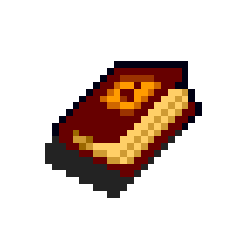

In [125]:
import random
x = random.randint(0,65)
randImg = np.reshape(x1_train[x], (1, 32, 32, 4)) 

resultImg = encoder.predict(randImg, batch_size=1)
resultImg = decoder.predict(resultImg, batch_size=1)
randImg = randImg.reshape(32,32,4)
resultImg = resultImg.reshape(32,32,4)

print(randImg.shape)
print(resultImg.shape)
from matplotlib import pyplot as plt

plt.tight_layout()
plt.imshow(randImg)
plt.axis('off')


(-0.5, 31.5, 31.5, -0.5)

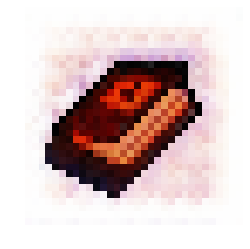

In [126]:
plt.tight_layout()
plt.imshow(resultImg)
plt.axis('off')

In [127]:
# Creating the generator
generator = Sequential()
generator.add(Dense(512*2*2, activation='relu', input_dim = 100))
generator.add(BatchNormalization())
generator.add(Reshape((2, 2, 512)))
generator.add(Conv2DTranspose(128, (5,5), strides=(2,2), padding='same', activation='relu'))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(64, (5, 5), strides=(2,2), padding='same', activation='relu'))

print(generator.summary())
generator.compile(loss = 'binary_crossentropy', optimizer = adam)  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 2048)              206848    
_________________________________________________________________
batch_normalization_5 (Batch (None, 2048)              8192      
_________________________________________________________________
reshape_3 (Reshape)          (None, 2, 2, 512)         0         
_________________________________________________________________
conv2d_transpose_17 (Conv2DT (None, 4, 4, 128)         1638528   
_________________________________________________________________
batch_normalization_6 (Batch (None, 4, 4, 128)         512       
_________________________________________________________________
conv2d_transpose_18 (Conv2DT (None, 8, 8, 64)          204864    
Total params: 2,058,944
Trainable params: 2,054,592
Non-trainable params: 4,352
______________________________________________________________

In [128]:
# Creating the discriminator
discriminator = Sequential()
discriminator.add(Conv2D(32, kernel_size = (5, 5), strides = (2, 2), padding = 'same', input_shape = (32, 32, 4)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Conv2D(64, kernel_size = (5, 5), strides = (2, 2), padding = 'same'))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Conv2D(128, kernel_size = (5, 5), strides = (2, 2), padding = 'same'))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Flatten())
discriminator.add(Dropout(0.3))
discriminator.add(Dense(1, activation = 'sigmoid'))

print(discriminator.summary())
discriminator.compile(loss = 'binary_crossentropy', optimizer = adam) 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 16, 16, 32)        3232      
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 8, 8, 64)          51264     
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 4, 4, 128)         204928    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
__________

In [129]:
# Create the GAN
decoder.trainable = False
encoder.trainale = False
discriminator.trainable = False
gan = Sequential()
gan.add(generator)
gan.add(decoder)
gan.add(discriminator)

encoder.trainable = False
decoder.trainable = False
autoencoder.trainable = False

gan.compile(loss = 'binary_crossentropy', optimizer = adam)
print(gan.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_17 (Sequential)   (None, 8, 8, 64)          2058944   
_________________________________________________________________
sequential_16 (Sequential)   (None, 32, 32, 4)         23668     
_________________________________________________________________
sequential_18 (Sequential)   (None, 1)                 261473    
Total params: 2,344,085
Trainable params: 2,054,592
Non-trainable params: 289,493
_________________________________________________________________
None


In [0]:
# Visualize generated data
def plotGeneratedImages():
  generated_images = decoder.predict(generator.predict(noise))
  fig = plt.figure(figsize=(9, 9))        
  for i in range(9 if generated_images.shape[0] > 9 else generated_images.shape[0]):
    plt.subplot(3, 3, i+1)
    img = np.clip(generated_images[i, :],0,1)
    img = img.reshape((32, 32, 4))
    plt.tight_layout()
    plt.imshow(img)
    plt.axis('off')

249 0.0 4.108793839430198: 100%|██████████| 78/78 [00:03<00:00, 23.66it/s]


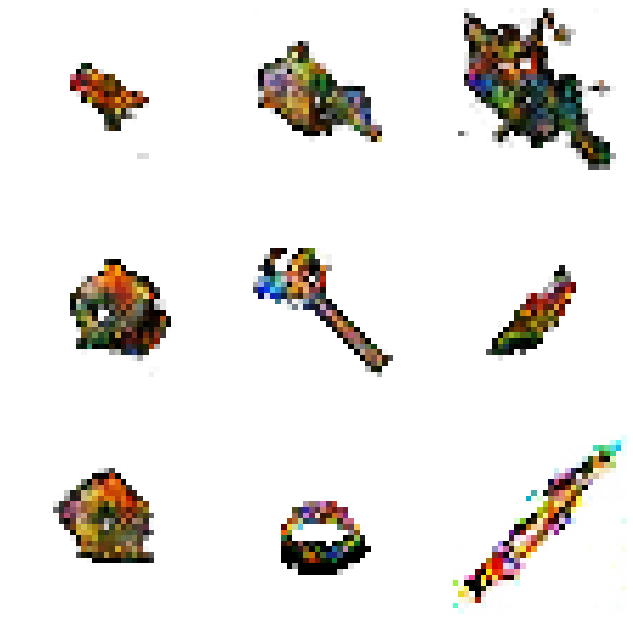

In [138]:
epochs = 250
batch_size = 32

batch_count = int(x1_train.shape[0] / batch_size)

dloss_sum = 0
gloss_sum = 100000

for epoch in range(epochs):
  
    dloss = dloss_sum / batch_count
    dloss_sum = 0
    
    gloss = gloss_sum / batch_count
    gloss_sum = 0

    for index in tqdm(range(batch_count), desc=str(epoch) + " " + str(dloss) + " " + str(gloss)):
        
        # Real images
        image_batch = x1_train[index * batch_size: (index + 1) * batch_size]
        
        # Get initial random input for generator
        noise = np.random.uniform(-1, 1, size=[batch_size, 100])
        
        # Generating images
        generated_data = generator.predict_on_batch(noise)
        generated_data = decoder.predict_on_batch(generated_data)

        # Train discriminator
        
        if gloss < 5:  
          X = np.concatenate((image_batch,generated_data))
          y = np.concatenate((np.zeros(image_batch.shape[0]),np.ones(batch_size)))

          discriminator.trainable = True
          dloss_sum += discriminator.train_on_batch(x=X, y=y)
        
        # Train generator 
        y = np.zeros(batch_size)
        discriminator.trainable = False
        gloss_sum += gan.train_on_batch(x=noise, y=y)
        
        #img = generated_images = decoder.predict(generator.predict(noise))
        
    
plotGeneratedImages()


In [1]:
noise = np.random.uniform(-1, 1, size=[9, 100])
plotGeneratedImages()

NameError: ignored